## Import modules

In [1]:
import numpy as np
import pandas as pd

from itertools import combinations

import scipy
from scipy.spatial.distance import mahalanobis
import scipy.optimize as optimize

from sklearn.linear_model import ElasticNetCV, Lasso

from base_learners.data_loading import load_data, load_from_folder
from base_learners.base_analysis import get_ate, report_ate, count_coefs, tradeoff

from visualization.ensemble_analysis_plot import overfitting_plot, ensemble_gap_plot

In [2]:
# Load the variables stored in 03 notebook
%store -r senario
%store -r T0
%store -r add
%store -r kf
%store -r control_units
%store -r sample_size
%store -r control_data
%store -r treat_data
%store -r untreat_data
%store -r initial_guess
%store -r magnitude
%store -r counterfactuals_syn
%store -r counterfactuals_mdd
%store -r counterfactuals_lasso
%store -r counterfactuals_mc

## Check current senario and $T_0$

In [3]:
print('We are currently in senario', senario, f'with T0 = {T0}')

We are currently in senario D with T0 = 24


## First-level training

In [4]:
# Synthetic Control
add_fake = np.ones((control_units - 1, 1)).T * magnitude
syn_fake = []
for sample_idx in np.arange(sample_size):
    print(f'{sample_idx+1}th iteration starts.')
    sample_control = control_data[sample_idx]
    counter_syn_fake = []
                   
    for i in np.arange(control_units):
        # Shift the current control unit to the last row.
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        # Synthetic Control Method
        X_control_fake = control_temp[:-1,:T0].T
        y_control_fake = control_temp[-1,:T0]
        X_control_fake_predict = control_temp[:-1,T0:].T
        
        X_restr_fake = np.concatenate((X_control_fake, add_fake), axis=0)
        y_restr_fake = np.append(y_control_fake, magnitude)

        regr_fake = Lasso(alpha=0, max_iter=2500)
        regr_fake.fit(X_restr_fake, y_restr_fake)
        y_hat_syn_fake = regr_fake.predict(X_control_fake_predict)
        counter_syn_fake.append(y_hat_syn_fake)
        
    counter_syn_fake = np.vstack(counter_syn_fake)    
    syn_fake.append(counter_syn_fake)

1th iteration starts.
2th iteration starts.
3th iteration starts.
4th iteration starts.
5th iteration starts.
6th iteration starts.
7th iteration starts.
8th iteration starts.
9th iteration starts.
10th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

11th iteration starts.
12th iteration starts.
13th iteration starts.
14th iteration starts.
15th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

16th iteration starts.
17th iteration starts.
18th iteration starts.
19th iteration starts.
20th iteration starts.
21th iteration starts.
22th iteration starts.
23th iteration starts.
24th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

25th iteration starts.
26th iteration starts.
27th iteration starts.
28th iteration starts.
29th iteration starts.
30th iteration starts.
31th iteration starts.
32th iteration starts.
33th iteration starts.
34th iteration starts.
35th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

36th iteration starts.
37th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

38th iteration starts.
39th iteration starts.
40th iteration starts.
41th iteration starts.
42th iteration starts.
43th iteration starts.
44th iteration starts.
45th iteration starts.
46th iteration starts.
47th iteration starts.
48th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarnin

49th iteration starts.
50th iteration starts.
51th iteration starts.
52th iteration starts.
53th iteration starts.
54th iteration starts.
55th iteration starts.
56th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

57th iteration starts.
58th iteration starts.
59th iteration starts.
60th iteration starts.
61th iteration starts.
62th iteration starts.
63th iteration starts.
64th iteration starts.
65th iteration starts.
66th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

67th iteration starts.
68th iteration starts.
69th iteration starts.
70th iteration starts.
71th iteration starts.
72th iteration starts.
73th iteration starts.
74th iteration starts.
75th iteration starts.
76th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

77th iteration starts.
78th iteration starts.
79th iteration starts.
80th iteration starts.
81th iteration starts.
82th iteration starts.
83th iteration starts.
84th iteration starts.
85th iteration starts.
86th iteration starts.
87th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

88th iteration starts.
89th iteration starts.
90th iteration starts.
91th iteration starts.
92th iteration starts.
93th iteration starts.
94th iteration starts.
95th iteration starts.
96th iteration starts.
97th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

98th iteration starts.
99th iteration starts.
100th iteration starts.


D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
D:\Python3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarn

In [5]:
# MDD: fake loss function
def func_loss_fake(params):
    """
    Used in the loop!
    """
    w, alpha = params
    
    return np.sum((y_control_fake - w * np.sum(control_select_fake.T, axis=1) - alpha * np.ones((T0,))) ** 2)

In [6]:
# MDD: Matching
mdd_fake=[]
for sample_idx in np.arange(sample_size):
    print(f'{sample_idx+1}th iteration starts.')
    sample_control = control_data[sample_idx]
    
    distances_fake = np.zeros((control_units,control_units - 1))
    for i in np.arange(control_units):
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        X_control_fake = control_temp[:-1,:T0]
        y_control_fake = control_temp[-1,:T0]

        for j in np.arange(X_control_fake.shape[0]):
            control_unit = X_control_fake[j].reshape(1, -1)
            treat_unit = y_control_fake.reshape(1,-1)

            # Calculate the inverse of covariance matrix of two vectors.
            df_comb = pd.DataFrame(np.concatenate((control_unit, treat_unit)))
            cov = df_comb.cov()
            vi = scipy.linalg.inv(cov)

            # Calculate the Mahalonobis distanec.
            md = mahalanobis(control_unit.reshape(-1,), treat_unit.reshape(-1,), vi)

            distances_fake[i, j] = md

    idx_md_sort = np.argsort(distances_fake, axis=1)
    idx_five = idx_md_sort[:, :5]

    # MDD: optimazation
    # For each iteration, pick up the control unit according to the previous selection.
    mdd_fake_hat = []
    for i in np.arange(control_units):
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        X_control_fake = control_temp[:-1,:T0]
        y_control_fake = control_temp[-1,:T0]
        X_control_fake_predict = control_temp[:-1,T0:].T

        idx_select = idx_five[i,:]
        control_select_fake = X_control_fake[idx_select,:]

        # Optimization.
        result_fake = optimize.minimize(func_loss_fake, initial_guess)

        # Estimation
        y_hat_mdd_fake = result_fake.x[0] * np.sum(X_control_fake_predict[:, idx_five[i]], axis=1) + result_fake.x[1]

        mdd_fake_hat.append(y_hat_mdd_fake)
        
    counter_mdd_fake = np.vstack(mdd_fake_hat)
    mdd_fake.append(counter_mdd_fake)

1th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


2th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


3th iteration starts.
4th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


5th iteration starts.
6th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


7th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


8th iteration starts.
9th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


10th iteration starts.
11th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


12th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


13th iteration starts.
14th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


15th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


16th iteration starts.
17th iteration starts.
18th iteration starts.
19th iteration starts.
20th iteration starts.
21th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


22th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


23th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


24th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


25th iteration starts.
26th iteration starts.
27th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


28th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


29th iteration starts.
30th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


31th iteration starts.
32th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


33th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


34th iteration starts.
35th iteration starts.
36th iteration starts.
37th iteration starts.
38th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


39th iteration starts.
40th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


41th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


42th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


43th iteration starts.
44th iteration starts.
45th iteration starts.
46th iteration starts.
47th iteration starts.
48th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


49th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


50th iteration starts.
51th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


52th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


53th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


54th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


55th iteration starts.
56th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


57th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


58th iteration starts.
59th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


60th iteration starts.
61th iteration starts.
62th iteration starts.
63th iteration starts.
64th iteration starts.
65th iteration starts.
66th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


67th iteration starts.
68th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


69th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


70th iteration starts.
71th iteration starts.
72th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


73th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


74th iteration starts.
75th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


76th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


77th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


78th iteration starts.
79th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


80th iteration starts.
81th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


82th iteration starts.
83th iteration starts.
84th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


85th iteration starts.
86th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


87th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


88th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


89th iteration starts.
90th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


91th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


92th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


93th iteration starts.


D:\Python3\lib\site-packages\scipy\spatial\distance.py:1066: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(m)


94th iteration starts.
95th iteration starts.
96th iteration starts.
97th iteration starts.
98th iteration starts.
99th iteration starts.
100th iteration starts.


In [7]:
# Lasso
lasso_fake = []
for sample_idx in np.arange(sample_size):
    print(f'{sample_idx+1}th iteration starts.')
    sample_control = control_data[sample_idx]
    counter_lasso_fake = []
            
    for i in np.arange(control_units):
        # Shift the current control unit to the last row.
        control_temp = np.roll(sample_control.values, - i - 1, 0)

        # Lasso
        X_control_fake = control_temp[:-1,:T0].T
        y_control_fake = control_temp[-1,:T0]
        X_control_fake_predict = control_temp[:-1,T0:].T

        regr_fake = ElasticNetCV(l1_ratio=1, cv=kf, max_iter=2500)
        regr_fake.fit(X_control_fake, y_control_fake)
        y_hat_lasso_fake = regr_fake.predict(X_control_fake_predict)
        counter_lasso_fake.append(y_hat_lasso_fake)
        
    counter_lasso_fake = np.vstack(counter_lasso_fake)
    lasso_fake.append(counter_lasso_fake)

1th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011714054921946104, tolerance: 0.010233626935483985
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005541497108401294, tolerance: 0.005471114856120696
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008453186729829698, tolerance: 0.005471114856120696
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008763786595718637, tolerance: 0.005

2th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01848346011417501, tolerance: 0.007451150085006943
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0071797171307458885, tolerance: 0.006652462193139366
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007377943415352084, tolerance: 0.006652462193139366
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012007837118103382, tolerance: 0.007

3th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016056373969795867, tolerance: 0.007181747600768552
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015202676625898526, tolerance: 0.007181747600768552
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004948768643628499, tolerance: 0.004679015014053549
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01529022625758475, tolerance: 0.0122

4th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009573465771187187, tolerance: 0.008442927322324056
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011127223433414213, tolerance: 0.010111132547975783
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00600951583377185, tolerance: 0.005759844557689502
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038414716737282806, tolerance: 0.003

5th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013507501465688465, tolerance: 0.00753097649893154
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01276145371938131, tolerance: 0.00753097649893154
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012061998359908399, tolerance: 0.00753097649893154
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01140649834980878, tolerance: 0.00753097

6th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0075744114649098915, tolerance: 0.00437627827604867
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01648688922909569, tolerance: 0.00437627827604867
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010112444934712528, tolerance: 0.008671561092731083
  positive)


7th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008846845352438959, tolerance: 0.006794352476450232
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009274936668409117, tolerance: 0.006794352476450232
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01077669482331775, tolerance: 0.006794352476450232
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00938416665711539, tolerance: 0.00725

8th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013177432174588388, tolerance: 0.008585080943690142
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009959105851460426, tolerance: 0.008585080943690142
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009098756458850055, tolerance: 0.006322633471847507
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008871690920415398, tolerance: 0.006

9th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.039708313808319406, tolerance: 0.010711526830864125
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005831544109238418, tolerance: 0.005589564266650338
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009587795412088318, tolerance: 0.005591310809250975
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01208867607436237, tolerance: 0.0055

10th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0053724711963224064, tolerance: 0.005287840681520378
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005615327861924951, tolerance: 0.005287840681520378
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005327712866139346, tolerance: 0.005287840681520378
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014182840247685236, tolerance: 0.00

11th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007247890442512617, tolerance: 0.007200653001358859
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007274728608223313, tolerance: 0.007200653001358859
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007245412106864135, tolerance: 0.007200653001358859
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005782759643081281, tolerance: 0.005

12th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01305032547133056, tolerance: 0.009881681091946535
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017207127160388414, tolerance: 0.012853939202188906
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016122339753222192, tolerance: 0.012853939202188906
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01634786611578798, tolerance: 0.01121

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007914300235898786, tolerance: 0.0060878319390210885
  positive)


13th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015137153620053079, tolerance: 0.010957474777265844
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01002699781571692, tolerance: 0.007888090145864208
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01181689316734058, tolerance: 0.010887812890238673
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011065545604293958, tolerance: 0.01088

14th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011998942170356908, tolerance: 0.00897836407652424
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013600095213166297, tolerance: 0.00897836407652424
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025867980990079253, tolerance: 0.009476493877347955
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018650722684650844, tolerance: 0.01677

15th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017465569027688865, tolerance: 0.011337556335396543
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011172218957814783, tolerance: 0.010811768447238012
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022415928304977295, tolerance: 0.011159787928995142
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011762781494476182, tolerance: 0.011

16th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006851333658859926, tolerance: 0.003944639148373742
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00795814168375042, tolerance: 0.003944639148373742
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007555432249619076, tolerance: 0.003944639148373742
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007184119015672952, tolerance: 0.0039

17th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006888074098296282, tolerance: 0.005942141427902192
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024603507217168197, tolerance: 0.013304275031299261
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04270945587716013, tolerance: 0.013304275031299261
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.029660458378644172, tolerance: 0.0122

18th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02124303300760666, tolerance: 0.008348424382179124
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012052452858759333, tolerance: 0.008348424382179124
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014703021561971286, tolerance: 0.011485588621076544
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010184722146854092, tolerance: 0.0088

19th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01779465623854204, tolerance: 0.010477687044839973
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020522437438201813, tolerance: 0.010477687044839973
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00935861112628416, tolerance: 0.008717571431957194
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0056765381299004325, tolerance: 0.0044

20th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0046639125358687306, tolerance: 0.004625873670930973
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007836360640909534, tolerance: 0.006120387069558237
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02042682347167979, tolerance: 0.006120387069558237
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.028964197887535237, tolerance: 0.006

21th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010654361774497634, tolerance: 0.008815376442736004
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030039945705479854, tolerance: 0.012674258596599274
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02881515728213091, tolerance: 0.012674258596599274
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02756868831753856, tolerance: 0.01267

22th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00791164459659821, tolerance: 0.006575959831336358
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010691710871745363, tolerance: 0.006575959831336358
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011696130554699785, tolerance: 0.006575959831336358
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011808619579044943, tolerance: 0.0065

23th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01599615465362003, tolerance: 0.010560836319239776
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014893664134413065, tolerance: 0.010560836319239776
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012358560140551145, tolerance: 0.006552468115889354
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01431686325048065, tolerance: 0.00655

24th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004839469004101815, tolerance: 0.0038635305532210497
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027725342342821868, tolerance: 0.009981623954883242
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02085403015228593, tolerance: 0.009981623954883242
  positive)


25th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005627506420922246, tolerance: 0.005432884277035665
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010828786930024759, tolerance: 0.008299482829156648
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011449697720421648, tolerance: 0.008288013743573228
  positive)


26th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005397680114519021, tolerance: 0.005233055720505118
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00795589450401435, tolerance: 0.005233055720505118
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009702120026450711, tolerance: 0.005233055720505118
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0102927020154161, tolerance: 0.005233

27th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009386686106275688, tolerance: 0.0068582092238870344
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016369829443498962, tolerance: 0.007765695223812785
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022321729421468872, tolerance: 0.007765695223812785
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012330252076241832, tolerance: 0.01

28th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010368631915414817, tolerance: 0.007355061610342132
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01652583425852594, tolerance: 0.007355061610342132
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009746715703689485, tolerance: 0.008761534348478603
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010199481548259143, tolerance: 0.0087

29th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013218656401872142, tolerance: 0.01120635705865442
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01373257995882593, tolerance: 0.01120635705865442
  positive)


30th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005938677205348131, tolerance: 0.004262873613497895
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010234273350940626, tolerance: 0.009313026309930592
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015618425109523132, tolerance: 0.009313026309930592
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018401323113735824, tolerance: 0.009

31th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010137432445934014, tolerance: 0.008826002146426365
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016049148396800827, tolerance: 0.00936059154879263
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015026638409465554, tolerance: 0.00936059154879263
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01271764767551048, tolerance: 0.009360

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015424708329009329, tolerance: 0.012489420883421693
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01587956760008767, tolerance: 0.012489420883421693
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012183034646705226, tolerance: 0.005927224548992079
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011127304279559214, tolerance: 0.0059

32th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014127838031020357, tolerance: 0.012672128105879196
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01036992455822755, tolerance: 0.010043460942320127
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010256461098309327, tolerance: 0.010043460942320127
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014199634850646847, tolerance: 0.0139

33th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009508623874929345, tolerance: 0.007055095457870553
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012548632660205783, tolerance: 0.010606815178283739
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01183674621175812, tolerance: 0.009165289911699548
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01893952184099512, tolerance: 0.01079

34th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010235686671313748, tolerance: 0.00924551595978905
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010468711701466044, tolerance: 0.00924551595978905
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010302530546123512, tolerance: 0.00924551595978905
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007602987328392874, tolerance: 0.007297

35th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022109662844916222, tolerance: 0.013221469000669447
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021644036364090957, tolerance: 0.013221469000669447
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01296223458893625, tolerance: 0.008451769243307676
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009313642844909459, tolerance: 0.0074

36th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013759603220228733, tolerance: 0.005777081955622719
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01820982430932433, tolerance: 0.015362378571478895
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011177439059780692, tolerance: 0.007960364106855057
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013052272785864405, tolerance: 0.0079

37th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009476064395874007, tolerance: 0.0063020464760737
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008186579727470777, tolerance: 0.006906176477409039
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008364485640960373, tolerance: 0.006906176477409039
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008014867459258418, tolerance: 0.00690

38th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008971585377656854, tolerance: 0.007946649599664376
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007575101936206918, tolerance: 0.00535512242411393
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006548722862975892, tolerance: 0.00535512242411393
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0061126212923908185, tolerance: 0.0053

39th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004975979554143917, tolerance: 0.003633150934507971
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00568343808789451, tolerance: 0.003633150934507971
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010002138237281716, tolerance: 0.003633150934507971
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00943565076765504, tolerance: 0.00363

40th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016873613301289225, tolerance: 0.013974200595576327
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024441804840771297, tolerance: 0.013974200595576327
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023286602097007503, tolerance: 0.013974200595576327
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022145160535273156, tolerance: 0.013

41th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006775845393395319, tolerance: 0.006180381965661759
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006459499223486986, tolerance: 0.006180381965661759
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00948610282682738, tolerance: 0.008689213732431299
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006214894837210022, tolerance: 0.0050

42th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004474926472170626, tolerance: 0.0042427870322793776
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00631702970492401, tolerance: 0.0042427870322793776
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008937990988891698, tolerance: 0.0082111672852805
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008399479590711634, tolerance: 0.0082

43th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013929097379749233, tolerance: 0.012486135310245306
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019172876508028125, tolerance: 0.012486135310245306
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031197244540800195, tolerance: 0.012486135310245306
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008476432385566557, tolerance: 0.007

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00703471731561256, tolerance: 0.006058952161043492
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008313898523107419, tolerance: 0.006058952161043492
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008438375266347886, tolerance: 0.006058952161043492
  positive)


44th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010676956165839968, tolerance: 0.005921467222632696
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017005764931282252, tolerance: 0.008257188651038843
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0077711976090847346, tolerance: 0.004820047452842069
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03138577313298763, tolerance: 0.017

45th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008384845016851772, tolerance: 0.007841203751518274
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011330917399793528, tolerance: 0.007627702341464806
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0054992431443162855, tolerance: 0.005422633142422729
  positive)


46th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00919711448520899, tolerance: 0.007270240658555682
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010531730610565004, tolerance: 0.010050622450685111
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02080778010818829, tolerance: 0.01083015356832862
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010877165879305317, tolerance: 0.010830

47th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015655217146358424, tolerance: 0.010201332408581787
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02507885184183989, tolerance: 0.010201332408581787
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027429857768682453, tolerance: 0.010201332408581787
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011639131345510034, tolerance: 0.0102

48th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012304504342803058, tolerance: 0.011907842255188516
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019043416459155083, tolerance: 0.011907842255188516
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01775727666303889, tolerance: 0.011907842255188516
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015476518062331523, tolerance: 0.0108

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014096584874086049, tolerance: 0.014014971117407782
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02835179833084389, tolerance: 0.014014971117407782
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02667445496764692, tolerance: 0.014014971117407782
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023795310993296154, tolerance: 0.01401

49th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03585603615108024, tolerance: 0.009977787946947939
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04044721135035001, tolerance: 0.009977787946947939
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04159138825585895, tolerance: 0.009977787946947939
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04190205974413663, tolerance: 0.0099777

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01471365257860624, tolerance: 0.0117238764952777
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03361924121497939, tolerance: 0.012213817721045203
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03175843054954497, tolerance: 0.012213817721045203
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017001877898158102, tolerance: 0.01221381

50th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008099655476786372, tolerance: 0.003771964839949236
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012418173146374611, tolerance: 0.004164185596613335
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004598106064786389, tolerance: 0.004164185596613335
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005167575256728951, tolerance: 0.004

51th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00706599266149488, tolerance: 0.006717048770218684
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025305357964742203, tolerance: 0.014469777576569863
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.046023672123264525, tolerance: 0.014469777576569863
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03926654208079361, tolerance: 0.01446

52th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01282930582337466, tolerance: 0.007983628129805269
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021952980232422536, tolerance: 0.008464187678002
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013393391324825088, tolerance: 0.009818759265764903
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010721927318917635, tolerance: 0.0096252

53th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026819807537969753, tolerance: 0.013859677448686523
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018529678606262534, tolerance: 0.013859677448686523
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02395656986630179, tolerance: 0.013859677448686523
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018020493570114926, tolerance: 0.0106

54th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05893320789948775, tolerance: 0.008979530977585966
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01546362818784841, tolerance: 0.008979530977585966
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009436809033629201, tolerance: 0.008979530977585966
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01023362127058669, tolerance: 0.008979

55th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012988331397642217, tolerance: 0.008335441035509502
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013512047673345129, tolerance: 0.008335441035509502
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01271863855754346, tolerance: 0.008335441035509502
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011977463573047686, tolerance: 0.0083

56th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014278673470623504, tolerance: 0.009721681972198092
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015854085219443537, tolerance: 0.009721681972198092
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01589768020541893, tolerance: 0.009721681972198092
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01066122454956231, tolerance: 0.00317

57th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007170418465261008, tolerance: 0.006091115570056138
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0074773019416826125, tolerance: 0.006091115570056138
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007329958083077681, tolerance: 0.006091115570056138
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00700550127494598, tolerance: 0.006

58th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005196570010446155, tolerance: 0.004946925187624161
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019628545304708922, tolerance: 0.01473994110526287
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010179361522997032, tolerance: 0.007119139390651904
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021134667006410535, tolerance: 0.0129

59th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01736277822702137, tolerance: 0.007551186893926142
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007677168046828942, tolerance: 0.007031326334780019
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011337010840569484, tolerance: 0.006953827330638851
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015643905390195334, tolerance: 0.0069

60th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012258724713691604, tolerance: 0.008732632101239889
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008493635542069944, tolerance: 0.006071280313905648
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018568247203993415, tolerance: 0.006071280313905648
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025003500225918573, tolerance: 0.006

61th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008403462933243455, tolerance: 0.005312766835906563
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006204792369633116, tolerance: 0.005312766835906563
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010002756691749104, tolerance: 0.005312766835906563
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008963898464624975, tolerance: 0.007

62th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010853501771187712, tolerance: 0.010103250158304525
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006374495400671254, tolerance: 0.005963656485977234
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01880473783359249, tolerance: 0.008610365167749746
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026879785907405696, tolerance: 0.0086

63th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009898972990118216, tolerance: 0.008004063611864077
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010293157909090578, tolerance: 0.008004063611864077
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007618706493312921, tolerance: 0.005938868312867569
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013149748112356668, tolerance: 0.005

64th iteration starts.
65th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016047473052755112, tolerance: 0.008171361545250035
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02730825439131146, tolerance: 0.008171361545250035
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02564340989020053, tolerance: 0.008171361545250035
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010849977479672424, tolerance: 0.00717

66th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013836481252943011, tolerance: 0.01061793241006688
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013571255174503472, tolerance: 0.01061793241006688
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012840422112111893, tolerance: 0.01061793241006688
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012081587745796596, tolerance: 0.010617

67th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011811842077437185, tolerance: 0.010056709728903587
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01311352431816043, tolerance: 0.010056709728903587
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013846971071806713, tolerance: 0.010056709728903587
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010816959710967855, tolerance: 0.0081

68th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015290027319799337, tolerance: 0.009727030842638292
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02285859666515111, tolerance: 0.009727030842638292
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01680956178559634, tolerance: 0.005449980897862306
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026941800267057836, tolerance: 0.00544

69th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007385295192646524, tolerance: 0.00702126657989426
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.031721754551686576, tolerance: 0.00702126657989426
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04177372304620877, tolerance: 0.012992620613615467
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03677284789215152, tolerance: 0.0129926

70th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009792776540968495, tolerance: 0.007890873287469896
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009080416314295327, tolerance: 0.007890873287469896
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008422868849047992, tolerance: 0.007890873287469896
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01224650936263949, tolerance: 0.0117

71th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012483349922356446, tolerance: 0.006055065242210134
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015712144077066226, tolerance: 0.006055065242210134
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01476057077095183, tolerance: 0.006055065242210134
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007154084391226945, tolerance: 0.0060

72th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013085826042559145, tolerance: 0.007721973028112085
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012274323018919286, tolerance: 0.007721973028112085
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.017866741282252185, tolerance: 0.01077163430645627
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06576689361999355, tolerance: 0.01077

73th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005201911834853634, tolerance: 0.004765087775410708
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009649498201428713, tolerance: 0.009342792583523753
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009348466634703512, tolerance: 0.009342792583523753
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015053588174561483, tolerance: 0.009

74th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005692217131906929, tolerance: 0.004629663808670086
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005122338169380125, tolerance: 0.004629663808670086
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0065662896302559615, tolerance: 0.004629663808670086
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007546232728410401, tolerance: 0.00

75th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010934735173747434, tolerance: 0.009608176956051739
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01814080245822397, tolerance: 0.010683320257562296
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.021838508227091213, tolerance: 0.010683320257562296
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020099982207353873, tolerance: 0.0106

76th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014337439805433894, tolerance: 0.008079438274398637
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013487832642287367, tolerance: 0.008079438274398637
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01268028739177518, tolerance: 0.008079438274398637
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011913948875970137, tolerance: 0.0080

77th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.025980514068349336, tolerance: 0.01987412879551818
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027009700646142054, tolerance: 0.01987412879551818
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02620534049210832, tolerance: 0.01987412879551818
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.024940839748805566, tolerance: 0.0198741

78th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005299166166593872, tolerance: 0.004414965402882408
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008216827652737013, tolerance: 0.007105488518468579
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008310105591948891, tolerance: 0.007105488518468579
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008007365170939446, tolerance: 0.007

79th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07790078148267687, tolerance: 0.009567718198948484
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07345848363061469, tolerance: 0.009567718198948484
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06955498168664187, tolerance: 0.009567718198948484
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06577982388091863, tolerance: 0.0095677

80th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01398332500473054, tolerance: 0.011575497925947857
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013308352416310898, tolerance: 0.011575497925947857
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012482559696556705, tolerance: 0.011575497925947857
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011690247129459541, tolerance: 0.0115

81th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014958319368943762, tolerance: 0.010013595716146089
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010014112207039887, tolerance: 0.008994674274749304
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020080639190448668, tolerance: 0.01467104524410863
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006835973909515403, tolerance: 0.0060

82th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006774593152006986, tolerance: 0.0065952881166700195
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014984650336016814, tolerance: 0.007877916039150279
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014074789845205715, tolerance: 0.007877916039150279
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013213225044099497, tolerance: 0.00

83th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012207985851264258, tolerance: 0.004577211209726662
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006507884044735235, tolerance: 0.0043136045029148135
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011472741346695958, tolerance: 0.006728640709020903
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010886533103866114, tolerance: 0.00

84th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02457784548497946, tolerance: 0.015870528313236952
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03743669701048724, tolerance: 0.015870528313236952
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04439868727795804, tolerance: 0.015870528313236952
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.047608212763901925, tolerance: 0.015870

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016820068736911997, tolerance: 0.011894525381489917
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008975392875677057, tolerance: 0.008796701183201618
  positive)


85th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0051508629899494895, tolerance: 0.0051115352580122205
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01993719873565336, tolerance: 0.0051115352580122205
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01886796926461176, tolerance: 0.0051115352580122205
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01783503280387866, tolerance: 0.00

86th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011848617606276646, tolerance: 0.008220315915260356
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011939838810881342, tolerance: 0.008220315915260356
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011394479686355097, tolerance: 0.008220315915260356
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010755884390548198, tolerance: 0.008

87th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.038275001122280994, tolerance: 0.009195595114305562
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03883715421420009, tolerance: 0.009195595114305562
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03634187824364732, tolerance: 0.009195595114305562
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.033998856474530714, tolerance: 0.00919

88th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.019260006645998695, tolerance: 0.008620757193702517
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01896998926061988, tolerance: 0.008620757193702517
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01727983878364725, tolerance: 0.008620757193702517
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023305297779229406, tolerance: 0.01073

89th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.020415978375532884, tolerance: 0.008286323160837737
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03444689551650848, tolerance: 0.008286323160837737
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.037747041830072714, tolerance: 0.008286323160837737
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00912282233632955, tolerance: 0.00833

90th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00450010809609927, tolerance: 0.0035501071192114296
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005830127426248999, tolerance: 0.0035501071192114296
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0062102355789901975, tolerance: 0.0035501071192114296
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006151888166534267, tolerance: 0.

D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.018491196050930192, tolerance: 0.007852976319918518
  positive)


91th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008893273569147597, tolerance: 0.006570810790414378
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009672162593613476, tolerance: 0.006570810790414378
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009580426205907044, tolerance: 0.006570810790414378
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009037535184821255, tolerance: 0.006

92th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.04395839027299875, tolerance: 0.006449274363876504
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03573954889872821, tolerance: 0.006449274363876504
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0360469830081489, tolerance: 0.006449274363876504
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03622780092318134, tolerance: 0.00644927

93th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010216979315581853, tolerance: 0.008145549231823142
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.009569241547335405, tolerance: 0.008145549231823142
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011765625166386462, tolerance: 0.006448733162109089
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012642924293472912, tolerance: 0.006

94th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010162437992099926, tolerance: 0.00951166316893719
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.061401516383313925, tolerance: 0.00951166316893719
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06152439100893681, tolerance: 0.00951166316893719
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06153694938685006, tolerance: 0.00951166

95th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010255741509672678, tolerance: 0.008276105705979796
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011227154909080439, tolerance: 0.008276105705979796
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011132834322639784, tolerance: 0.008276105705979796
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00859313368187098, tolerance: 0.0082

96th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015049283021716153, tolerance: 0.010271683456556758
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02378215755809432, tolerance: 0.008835668684594383
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023391140684274614, tolerance: 0.008835668684594383
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022868636118857477, tolerance: 0.0088

97th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011014193677551631, tolerance: 0.009078127666225535
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0154166749533724, tolerance: 0.011322937992627959
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023668725224931464, tolerance: 0.011322937992627959
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023949554666072626, tolerance: 0.01132

98th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013177976979190875, tolerance: 0.008042371595369522
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022894522175314957, tolerance: 0.008042371595369522
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01082032187473958, tolerance: 0.009111129308014622
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010257209731763473, tolerance: 0.0091

99th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00700657708068908, tolerance: 0.005096878723330394
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006730909663952733, tolerance: 0.00659641463284741
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00971573360815503, tolerance: 0.005915144803451835
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007242220025571733, tolerance: 0.005915

100th iteration starts.


D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02193084667184353, tolerance: 0.008663358955570905
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02115468801194087, tolerance: 0.008663358955570905
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02380298286078575, tolerance: 0.008663358955570905
  positive)
D:\Python3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.026274490902269854, tolerance: 0.013051

In [8]:
# WOC Method
# Already available in 04 notebook
path_mc_temp = 'meta_learner/ensemble_mc/'

mc_fake = []
for sample_idx in np.arange(sample_size):
    mc_fake_hat = pd.read_csv(path_mc_temp + 'mc_hat_temp_{}.csv'.format(sample_idx + 1)).values
    mc_fake.append(mc_fake_hat)

## Second-level training: meta-learner

### With nonnegative constraint?

In [9]:
nonnegative = True  # True or False

### Three functions for optimization

In [10]:
def func_ensemb_2(params):
    """
    Used only in the loop!
    """
    theta1, theta2 = params
    method1, method2 = individual_keys_2    
    return np.sum(np.sum(((control_true_new - theta1 * individual_pred_new[method1] - theta2 * individual_pred_new[method2]) ** 2), axis=1))

In [11]:
def func_ensemb_3(params):
    """
    Used only in the loop!
    """
    theta1, theta2, theta3 = params
    method1, method2, method3 = individual_keys_3    
    return np.sum(np.sum(((control_true_new - theta1 * individual_pred_new[method1] - theta2 * individual_pred_new[method2] - theta3 * individual_pred_new[method3]) ** 2), axis=1))

In [12]:
def func_ensemb_4(params):
    """
    Used only in the loop!
    """
    theta1, theta2, theta3, theta4 = params
    method1, method2, method3, method4 = individual_keys_4
    
    return np.sum(np.sum(((control_true_new - theta1 * individual_pred_new[method1] - theta2 * individual_pred_new[method2] - theta3 * individual_pred_new[method3] - theta4 * individual_pred_new[method4]) ** 2), axis=1))

In [13]:
add_transpose = add.T

method_vars = [syn_fake, mdd_fake, mc_fake, lasso_fake]
analysis_dict = {}
counter_en_dict = {}
for sample in np.arange(sample_size):
    # True outcomes of test control unit (imaginary treat unit).
    control_sample_true = control_data[sample].values[:,T0:]
    
    # Add sum-to-one constraint.
    control_true_new = np.concatenate((control_sample_true, add_transpose), axis=1)
    
    # Some useful dictionaries to store predictions for treat unit and control units,in each dataset. 
    sample_dict = {'syn': syn_fake[sample], 'mdd': mdd_fake[sample], 'mc': mc_fake[sample], 'lasso': lasso_fake[sample]}
    counter_dict = {'syn': counterfactuals_syn[sample], 
                    'mdd': counterfactuals_mdd[sample], 
                    'mc': counterfactuals_mc[sample], 
                    'lasso': counterfactuals_lasso[sample]}
    
    # Outcomes for true treated unit.
    untreat_iter_true = untreat_data[sample].values.reshape(-1,)[T0:]
    
    # In-sample mse in control group.
    in_mse_syn = np.mean((control_sample_true - sample_dict['syn']) ** 2)
    in_mse_mdd = np.mean((control_sample_true - sample_dict['mdd']) ** 2)
    in_mse_mc = np.mean((control_sample_true - sample_dict['mc']) ** 2)
    in_mse_lasso = np.mean((control_sample_true - sample_dict['lasso']) ** 2)
    
    print('')
    print('In-sample {}:'.format(sample + 1))
    print('MSE of SC:', in_mse_syn)
    print('MSE of MDD:', in_mse_mdd)
    print('MSE of MC:', in_mse_mc)
    print('MSE of LASSO:', in_mse_lasso)
    print('')
    
    # Start to stacking first-level results.
    print('Out of sample {}:'.format(sample + 1))    
    analysis_dict[f'{sample + 1}'] = {'Individual Out-of-Sample': {}, 'Ensemble Out-of-Sample': {}, 
                                      'Individual In-Sample': {'syn': in_mse_syn,
                                                              'mdd': in_mse_mdd,
                                                              'mc': in_mse_mc,
                                                              'lasso': in_mse_lasso}}
    counter_en_dict[f'{sample + 1}'] = {}
    # For each possible combination of base learner:
    for power in np.arange(len(sample_dict)) + 1:
        for methods_comb in combinations(sample_dict.keys(), power):
            #print(methods_comb)
            number_methods = len(methods_comb)
            
            # Add sum-to-one constraint.
            individual_pred_new = {}
            for individual_pred in methods_comb:
                individual_pred_new[individual_pred] = np.concatenate((sample_dict[individual_pred], add_transpose), axis=1)
                
            # Stacked regression estimation for each possible combination:
            len_individuals = len(individual_pred_new)
            if len_individuals == 1:
                individual_keys_1 = list(individual_pred_new.keys())
                print(individual_keys_1)
                mse = np.mean((untreat_iter_true - counter_dict[individual_keys_1[0]]) ** 2)
                print(mse)
                
                # Recording the results.
                analysis_dict[f'{sample + 1}']['Individual Out-of-Sample'][individual_keys_1[0]] = mse
                
            elif len_individuals == 2:
                individual_keys_2 = list(individual_pred_new.keys())
                print(individual_keys_2)
                
                # Optimization.
                cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[1] - 1e-100})
                initial_guess_ensemb = [0.5, 0.5]
                if nonnegative:
                    results_ensemb = optimize.minimize(func_ensemb_2, initial_guess_ensemb, method='SLSQP',constraints=cons)
                else:
                    results_ensemb = optimize.minimize(func_ensemb_2, initial_guess_ensemb, method='Nelder-Mead')
                
                # Report optimization results.                         
                print(results_ensemb.x)
                coefs_ensemb = {}
                coefs_ensemb[individual_keys_2[0]] = results_ensemb.x[0]
                coefs_ensemb[individual_keys_2[1]] = results_ensemb.x[1]
                
                # Ensemble estimation.
                counterfactuals_ensemble = coefs_ensemb[individual_keys_2[0]] * counter_dict[individual_keys_2[0]] + coefs_ensemb[individual_keys_2[1]] * counter_dict[individual_keys_2[1]]                
                mse = np.mean((untreat_iter_true - counterfactuals_ensemble) ** 2)
                print(mse)                
                
                # Recording
                analysis_dict[f'{sample + 1}']['Ensemble Out-of-Sample'][','.join(individual_keys_2)] = mse
                counter_en_dict[f'{sample + 1}'][','.join(individual_keys_2)] = counterfactuals_ensemble
                
            elif len_individuals == 3:
                individual_keys_3 = list(individual_pred_new.keys())
                print(individual_keys_3)
                
                # Optimization.
                cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[1] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[2] - 1e-100})
                initial_guess_ensemb = [0.3, 0.3, 0.4]
                if nonnegative:
                    results_ensemb = optimize.minimize(func_ensemb_3, initial_guess_ensemb, method='SLSQP', constraints=cons)
                else:
                    results_ensemb = optimize.minimize(func_ensemb_3, initial_guess_ensemb, method='Nelder-Mead')
                
                # Report optimization results.
                print(results_ensemb.x)
                coefs_ensemb = {}
                coefs_ensemb[individual_keys_3[0]] = results_ensemb.x[0]
                coefs_ensemb[individual_keys_3[1]] = results_ensemb.x[1]
                coefs_ensemb[individual_keys_3[2]] = results_ensemb.x[2]
                
                # Ensemble estimation.
                counterfactuals_ensemble = coefs_ensemb[individual_keys_3[0]] * counter_dict[individual_keys_3[0]] + coefs_ensemb[individual_keys_3[1]] * counter_dict[individual_keys_3[1]] + coefs_ensemb[individual_keys_3[2]] * counter_dict[individual_keys_3[2]]
                mse = np.mean((untreat_iter_true - counterfactuals_ensemble) ** 2)
                print(mse)
                
                # Recording.
                analysis_dict[f'{sample + 1}']['Ensemble Out-of-Sample'][','.join(individual_keys_3)] = mse
                counter_en_dict[f'{sample + 1}'][','.join(individual_keys_3)] = counterfactuals_ensemble
                
            else:
                individual_keys_4 = list(individual_pred_new.keys())
                print(individual_keys_4)
                
                # Optimization.
                cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[1] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[2] - 1e-100},
                        {'type': 'ineq', 'fun': lambda x: x[3] - 1e-100})
                initial_guess_ensemb = [0.4, 0.1, 0.1, 0.4]
                if nonnegative:
                    results_ensemb = optimize.minimize(func_ensemb_4, initial_guess_ensemb, method='SLSQP', constraints=cons)
                else:
                    results_ensemb = optimize.minimize(func_ensemb_4, initial_guess_ensemb, method='Nelder-Mead')

                # Report optimization results.
                print(results_ensemb.x)
                coefs_ensemb[individual_keys_4[0]] = results_ensemb.x[0]
                coefs_ensemb[individual_keys_4[1]] = results_ensemb.x[1]
                coefs_ensemb[individual_keys_4[2]] = results_ensemb.x[2]
                coefs_ensemb[individual_keys_4[3]] = results_ensemb.x[3]
                
                # Ensemble estimation.
                counterfactuals_ensemble = coefs_ensemb[individual_keys_4[0]] * counter_dict[individual_keys_4[0]] + coefs_ensemb[individual_keys_4[1]] * counter_dict[individual_keys_4[1]] + coefs_ensemb[individual_keys_4[2]] * counter_dict[individual_keys_4[2]] + coefs_ensemb[individual_keys_4[3]] * counter_dict[individual_keys_4[3]]
                mse = np.mean((untreat_iter_true - counterfactuals_ensemble) ** 2)
                print(mse)               
                
                # Recording.
                analysis_dict[f'{sample + 1}']['Ensemble Out-of-Sample'][','.join(individual_keys_4)] = mse
                counter_en_dict[f'{sample + 1}'][','.join(individual_keys_4)] = counterfactuals_ensemble


In-sample 1:
MSE of SC: 3.482594761180403
MSE of MDD: 2.6275388268845576
MSE of MC: 2.0819003740314237
MSE of LASSO: 2.857566353636161

Out of sample 1:
['syn']
0.7744374982785991
['mdd']
2.519088133808913
['mc']
1.9255675324021333
['lasso']
0.5346156144115227
['syn', 'mdd']
[0.5 0.5]
1.0645010340087995
['syn', 'mc']
[0.5 0.5]
1.034485550330246
['syn', 'lasso']
[0.5 0.5]
0.5418010078665436
['mdd', 'mc']
[0.5 0.5]
2.0695095334566282
['mdd', 'lasso']
[0.5 0.5]
1.2240501566008637
['mc', 'lasso']
[0.5 0.5]
1.011391815415187
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.3238695517929597
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.792836611173986
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.7511775213518578
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.2419076586809206
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.6627449059419174

In-sample 2:
MSE of SC: 3.263795157127863
MSE of MDD: 2.579332788573066
MSE of MC: 1.6458465421551767
MSE of LASSO: 2.8355285948069087

Out of sample 2:
['syn']
0.594933758532486
['md

[0.5 0.5]
2.303101484519836
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
2.116226185997102
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
2.0809789056850008
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
2.012742173583529
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
2.3831881531993315
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
1.9794463936364608

In-sample 17:
MSE of SC: 4.515974341139811
MSE of MDD: 3.05259349127788
MSE of MC: 2.058116173611187
MSE of LASSO: 3.133775463096935

Out of sample 17:
['syn']
2.603310248980408
['mdd']
0.8394689002262005
['mc']
1.8008718498010756
['lasso']
1.1405214854842212
['syn', 'mdd']
[0.5 0.5]
1.35593206888163
['syn', 'mc']
[0.5 0.5]
1.9345628695553054
['syn', 'lasso']
[0.5 0.5]
1.5204088004828744
['mdd', 'mc']
[0.5 0.5]
1.2067875260783574
['mdd', 'lasso']
[0.5 0.5]
0.9279186277268517
['mc', 'lasso']
[0.5 0.5]
1.2875470330868934
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.4387804998671525
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.1589575015103024
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.42451787

[0.4 0.1 0.1 0.4]
1.936886151806246

In-sample 31:
MSE of SC: 3.4571467829928815
MSE of MDD: 2.305324923195545
MSE of MC: 1.7339124646015698
MSE of LASSO: 3.3642397118643004

Out of sample 31:
['syn']
0.5921103188810757
['mdd']
1.4949565792634723
['mc']
1.2941504061286517
['lasso']
1.0153796431199973
['syn', 'mdd']
[0.5 0.5]
0.6460366517278219
['syn', 'mc']
[0.5 0.5]
0.7431346516732122
['syn', 'lasso']
[0.5 0.5]
0.7465694698369351
['mdd', 'mc']
[0.5 0.5]
1.2798585383032826
['mdd', 'lasso']
[0.5 0.5]
1.031246185566154
['mc', 'lasso']
[0.5 0.5]
1.0927964554994098
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
0.8496298468361654
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.7542462996705234
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.8428424392623274
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.0643663231025509
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.7393852637218656

In-sample 32:
MSE of SC: 2.086948626620453
MSE of MDD: 1.572156598650626
MSE of MC: 1.0704928502297226
MSE of LASSO: 1.7137469338410176

Out 


In-sample 44:
MSE of SC: 4.439637116534719
MSE of MDD: 3.2125636051244246
MSE of MC: 2.290167482034232
MSE of LASSO: 3.155587377905469

Out of sample 44:
['syn']
0.8050307364305422
['mdd']
1.3480061877988012
['mc']
0.5850836365932325
['lasso']
0.7541540057233428
['syn', 'mdd']
[0.5 0.5]
0.9955434619228116
['syn', 'mc']
[0.5 0.5]
0.5009975257198591
['syn', 'lasso']
[0.5 0.5]
0.6164870966666814
['mdd', 'mc']
[0.5 0.5]
0.7966344950459882
['mdd', 'lasso']
[0.5 0.5]
0.9554715184755312
['mc', 'lasso']
[0.5 0.5]
0.5929137142349158
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
0.6760878926210673
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.7942390241179172
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.5337254498622068
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
0.7377102312381022
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.6342233487200185

In-sample 45:
MSE of SC: 3.6626429740395148
MSE of MDD: 2.9370690988109294
MSE of MC: 1.962198338768895
MSE of LASSO: 3.0346247599651575

Out of sample 45:
['syn']
0.670041193607

[0.4 0.1 0.1 0.4]
1.424979399909213

In-sample 59:
MSE of SC: 3.5204737283676035
MSE of MDD: 2.4325540999635025
MSE of MC: 1.7426452815422373
MSE of LASSO: 2.7061362285597017

Out of sample 59:
['syn']
0.8855505638879154
['mdd']
1.6046212754643925
['mc']
0.7376904370962633
['lasso']
1.7973113638121099
['syn', 'mdd']
[0.5 0.5]
0.9569950524038663
['syn', 'mc']
[0.5 0.5]
0.6027771119254669
['syn', 'lasso']
[0.5 0.5]
1.2510191763930054
['mdd', 'mc']
[0.5 0.5]
1.0766094510463364
['mdd', 'lasso']
[0.5 0.5]
1.5440731038201634
['mc', 'lasso']
[0.5 0.5]
1.0346697669994402
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
0.7927878962078413
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.2435569647841285
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.9755566031095864
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
1.2005136560030134
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
1.1038651492295533

In-sample 60:
MSE of SC: 3.2765354939052456
MSE of MDD: 3.137311754458472
MSE of MC: 1.9521937160514782
MSE of LASSO: 3.076521958312028

Ou

[0.4 0.1 0.1 0.4]
0.46237791034138986

In-sample 73:
MSE of SC: 3.05599985819504
MSE of MDD: 2.566849093945315
MSE of MC: 1.6644992154205143
MSE of LASSO: 2.767710734910381

Out of sample 73:
['syn']
1.8059327876955218
['mdd']
1.1825426026855361
['mc']
1.0877074734442147
['lasso']
0.7721772257699276
['syn', 'mdd']
[0.5 0.5]
1.18992314457088
['syn', 'mc']
[0.5 0.5]
1.143309482267266
['syn', 'lasso']
[0.5 0.5]
1.128968487822209
['mdd', 'mc']
[0.5 0.5]
1.095726807280275
['mdd', 'lasso']
[0.5 0.5]
0.7680798280823294
['mc', 'lasso']
[0.5 0.5]
0.7693834065555816
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.057476124237461
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.9185643123283277
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.9137893328348644
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
0.7982398224653272
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.9978114485167245

In-sample 74:
MSE of SC: 3.760926702646541
MSE of MDD: 2.636394980157608
MSE of MC: 2.0661445509060132
MSE of LASSO: 2.8368100296568097

Out of sam

[0.5 0.5]
0.7227052799694603
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
0.9915122215054554
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.665379829023735
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.8139729275010189
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
0.6986925184552151
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
0.7777181160929697

In-sample 85:
MSE of SC: 3.0505268722476275
MSE of MDD: 2.0185177850886724
MSE of MC: 1.6806433781394674
MSE of LASSO: 2.052952782748135

Out of sample 85:
['syn']
0.959033597264129
['mdd']
2.193716607038168
['mc']
1.6602079552082059
['lasso']
1.0086790893229491
['syn', 'mdd']
[0.5 0.5]
1.0552734141345994
['syn', 'mc']
[0.5 0.5]
0.9628228617633222
['syn', 'lasso']
[0.5 0.5]
0.9582887564110744
['mdd', 'mc']
[0.5 0.5]
1.8547177511363888
['mdd', 'lasso']
[0.5 0.5]
1.2444595438306492
['mc', 'lasso']
[0.5 0.5]
1.1033750890303025
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
1.2211712678612874
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
0.9781932674311976
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
0.9

[0.3 0.3 0.4]
5.370932189135751
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
4.509185667683349
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
3.8324703594097893
['mdd', 'mc', 'lasso']
[0.3 0.3 0.4]
5.824233790513674
['syn', 'mdd', 'mc', 'lasso']
[0.4 0.1 0.1 0.4]
3.785945964655833

In-sample 98:
MSE of SC: 3.1826187702308704
MSE of MDD: 2.5188541516140366
MSE of MC: 1.688061249281831
MSE of LASSO: 2.4877321022070302

Out of sample 98:
['syn']
1.127779946844517
['mdd']
4.609616814400607
['mc']
3.1834597931781734
['lasso']
2.012300103106684
['syn', 'mdd']
[0.5 0.5]
1.9389994114499391
['syn', 'mc']
[0.5 0.5]
1.442581531640737
['syn', 'lasso']
[0.5 0.5]
1.3547646148713677
['mdd', 'mc']
[0.5 0.5]
3.753029685495848
['mdd', 'lasso']
[0.50000003 0.50000003]
2.9520735196861403
['mc', 'lasso']
[0.5 0.5]
2.421652124525306
['syn', 'mdd', 'mc']
[0.3 0.3 0.4]
2.2487687656074358
['syn', 'mdd', 'lasso']
[0.3 0.3 0.4]
1.9158520641112595
['syn', 'mc', 'lasso']
[0.3 0.3 0.4]
1.6536765946214587
['mdd', 'mc', 'lasso']
[0.3

In [14]:
# Analysis: when does ensemble method work?
# Out-of-Sample: for each sample, select the best result, perhaps individual or ensemble.
out_best_report = {}
overfitting = {}
for sample in np.arange(sample_size) + 1:
    out_best_report[f'{sample}'] = {}
    # First compare the individual methods.
    min_ind_key = min(analysis_dict[f'{sample}']['Individual Out-of-Sample'], key=analysis_dict[f'{sample}']['Individual Out-of-Sample'].get)
    min_ind_value = analysis_dict[f'{sample}']['Individual Out-of-Sample'][min_ind_key]
    
    # Second comapre ensemble methods.
    min_en_key = min(analysis_dict[f'{sample}']['Ensemble Out-of-Sample'], key=analysis_dict[f'{sample}']['Ensemble Out-of-Sample'].get)
    min_en_value = analysis_dict[f'{sample}']['Ensemble Out-of-Sample'][min_en_key]
    
    # Compare all methods.
    out_best_report[f'{sample}'][min_ind_key] = min_ind_value
    out_best_report[f'{sample}'][min_en_key] = min_en_value
    
    # Gap between individual method and ensemble method (individual_mse - ensemble_mse). 
    # + denotes ensemble dominates and - denotes individual dominates
    out_best_report[f'{sample}']['Gap'] = min_ind_value - min_en_value
    
    # Overfitting and ensemble method selection.
    overfit_syn = analysis_dict[f'{sample}']['Individual Out-of-Sample']['syn'] - analysis_dict[f'{sample}']['Individual In-Sample']['syn']
    overfit_mdd = analysis_dict[f'{sample}']['Individual Out-of-Sample']['mdd'] - analysis_dict[f'{sample}']['Individual In-Sample']['mdd']
    overfit_mc = analysis_dict[f'{sample}']['Individual Out-of-Sample']['mc'] - analysis_dict[f'{sample}']['Individual In-Sample']['mc']
    overfit_lasso = analysis_dict[f'{sample}']['Individual Out-of-Sample']['lasso'] - analysis_dict[f'{sample}']['Individual In-Sample']['lasso']
    overfit_total = overfit_syn + overfit_mdd + overfit_mc + overfit_lasso
    
    overfitting[f'{sample}'] = {'syn': overfit_syn, 'mdd': overfit_mdd, 'mc': overfit_mc, 'lasso': overfit_lasso, 'total': overfit_total}

In [15]:
out_best_report

{'1': {'lasso': 0.5346156144115227,
  'syn,lasso': 0.5418010078665436,
  'Gap': -0.007185393455020894},
 '2': {'syn': 0.594933758532486,
  'syn,mc': 1.2497689669913001,
  'Gap': -0.6548352084588142},
 '3': {'mdd': 0.24610334196013137,
  'syn,mdd': 0.3976744555422542,
  'Gap': -0.15157111358212286},
 '4': {'mc': 1.459069074029849,
  'syn,mdd,mc': 1.5514295825207525,
  'Gap': -0.09236050849090338},
 '5': {'syn': 1.4313555848373705,
  'syn,lasso': 1.476648130802305,
  'Gap': -0.04529254596493448},
 '6': {'syn': 0.19122123068786903,
  'syn,lasso': 0.1851515736471088,
  'Gap': 0.006069657040760235},
 '7': {'syn': 0.17637847658448194,
  'syn,lasso': 0.21898245183956963,
  'Gap': -0.04260397525508769},
 '8': {'mc': 1.110459397923796,
  'syn,mdd,mc': 0.7837302694468056,
  'Gap': 0.3267291284769904},
 '9': {'syn': 0.7360799741264613,
  'syn,lasso': 0.8293816909330521,
  'Gap': -0.09330171680659083},
 '10': {'mc': 1.8037620433560495,
  'syn,mc': 1.70347540162406,
  'Gap': 0.10028664173198942},
 

In [16]:
overfitting

{'1': {'syn': -2.708157262901804,
  'mdd': -0.10845069307564481,
  'mc': -0.1563328416292904,
  'lasso': -2.3229507392246385,
  'total': -5.295891536831378},
 '2': {'syn': -2.6688613985953773,
  'mdd': 1.0164727929447177,
  'mc': 0.7400927900689853,
  'lasso': 1.3443857043224732,
  'total': 0.4320898887407989},
 '3': {'syn': -0.9774077345921193,
  'mdd': -1.9665791381254294,
  'mc': -0.4260863607513473,
  'lasso': -2.033517455206725,
  'total': -5.403590688675621},
 '4': {'syn': 0.11456437599706204,
  'mdd': -0.5796305319807837,
  'mc': -0.2803351734535271,
  'lasso': -2.714216156479087,
  'total': -3.4596174859163358},
 '5': {'syn': -3.3647000115002275,
  'mdd': 0.9441422015464154,
  'mc': -1.0305700187536677,
  'lasso': -3.351678315472613,
  'total': -6.802806144180093},
 '6': {'syn': -2.9976725615685553,
  'mdd': 1.1128017442279559,
  'mc': 1.0193675452116542,
  'lasso': -1.4504705114080254,
  'total': -2.315973783536971},
 '7': {'syn': -3.529447705607751,
  'mdd': -1.74701696411765

In [17]:
analysis_dict

{'1': {'Individual Out-of-Sample': {'syn': 0.7744374982785991,
   'mdd': 2.519088133808913,
   'mc': 1.9255675324021333,
   'lasso': 0.5346156144115227},
  'Ensemble Out-of-Sample': {'syn,mdd': 1.0645010340087995,
   'syn,mc': 1.034485550330246,
   'syn,lasso': 0.5418010078665436,
   'mdd,mc': 2.0695095334566282,
   'mdd,lasso': 1.2240501566008637,
   'mc,lasso': 1.011391815415187,
   'syn,mdd,mc': 1.3238695517929597,
   'syn,mdd,lasso': 0.792836611173986,
   'syn,mc,lasso': 0.7511775213518578,
   'mdd,mc,lasso': 1.2419076586809206,
   'syn,mdd,mc,lasso': 0.6627449059419174},
  'Individual In-Sample': {'syn': 3.482594761180403,
   'mdd': 2.6275388268845576,
   'mc': 2.0819003740314237,
   'lasso': 2.857566353636161}},
 '2': {'Individual Out-of-Sample': {'syn': 0.594933758532486,
   'mdd': 3.5958055815177836,
   'mc': 2.385939332224162,
   'lasso': 4.179914299129382},
  'Ensemble Out-of-Sample': {'syn,mdd': 1.6649296921290608,
   'syn,mc': 1.2497689669913001,
   'syn,lasso': 1.718463771

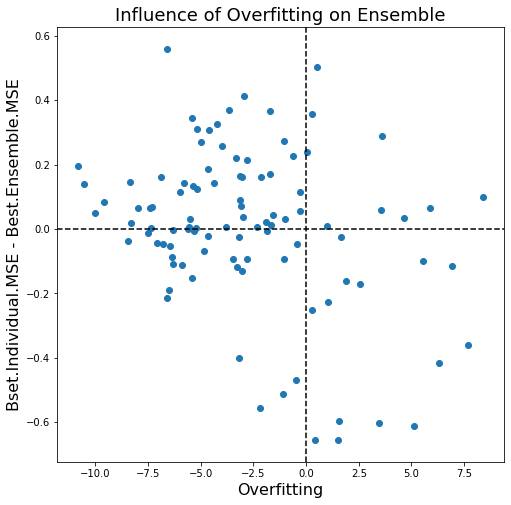

In [18]:
# Visualization 1: overfitting and ensemble.
overfitting_plot(overfitting, out_best_report)

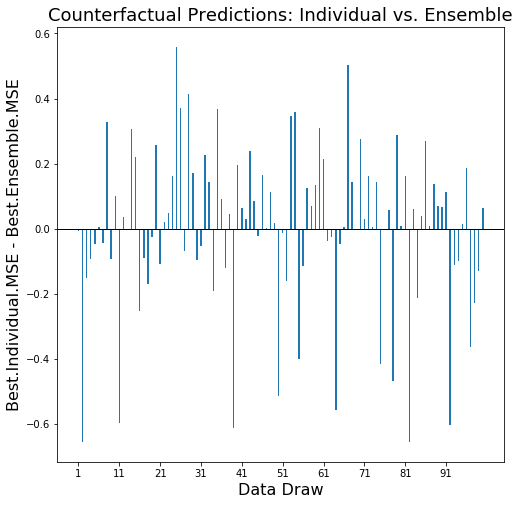

In [19]:
# Visualization 2: ensemble better?
ensemble_gap_plot(out_best_report)

## Store some variables for usage in notebook 05 and 06

In [22]:
%%capture
%store out_best_report
%store counter_en_dict
%store nonnegative

Click here to go to [06 Visualization and generating report](06%20Visualization%20and%20generating%20report.ipynb)